In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = '../../surveys-save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (../../surveys-save)
(0) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=spm-mcmc-estw.splcds - 60.764[mbs]
(1) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=linear-fstw.splcds - 171.892[mbs]
(2) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe.splcds - 8.842[mbs]
(3) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=bspline-fstw.splcds - 164.567[mbs]
(4) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=spm-mcmc-fstw.splcds - 151.221[mbs]
(5) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=spm-mle-fstw.splcds - 171.891[mbs]
(6) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=spm-mle-estw.splcds - 172.188[mbs]
────────────────

In [3]:
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir

filedir = f'../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe.splcds'
filedict = get_dict_from_filedir(filedir)
root_folder = filedict['*rootdir*']
cfilename = filedict['*cfilename*']
survey = filedict['survey']
lcdataset = load_pickle(filedir)
print(lcdataset)

> loading: ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe.splcds
LCDataset:
[outliers - samples 10]
(.) obs_samples: 541 - min_len: 14 - max_dur: 408.0[days] - dur(p50): 133.8[days] - cadence(p50): 1.0[days]
(g) obs_samples: 260 - min_len: 6 - max_dur: 408.0[days] - dur(p50): 133.8[days] - cadence(p50): 3.0[days]
(r) obs_samples: 281 - min_len: 8 - max_dur: 376.0[days] - dur(p50): 128.7[days] - cadence(p50): 3.0[days]
   |█▌      | SLSN - 2/10 (20.00%)
   |▊       | SNIa - 1/10 (10.00%)
   |█▌      | SNIbc - 2/10 (20.00%)
   |████    | allSNII - 5/10 (50.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[faint - samples 48]
(.) obs_samples: 1,107 - min_len: 7 - max_dur: 298.1[days] - dur(p50): 40.5[days] - cadence(p50): 1.0[days]
(g) obs_samples: 450 - min_len: 0 - max_dur: 221.7[days] - dur(p50): 28.0[days] - cadence(p50): 2.9[days]
(r) obs_samples: 657 - min_len: 4 - max_dur: 298.1[days] - dur(p50): 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
> loading: ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=bspline-fstw.splcds
100%|██████████| 50/50 [14:10, 17.00s/it, training id: 49 - samples: 38412 - features: 18 ['SF_ML_amplitude_g', 'IAR_phi_g', 'LinearTrend_g', 'SPM_t0_g', 'SPM_gamma_g', 'SPM_beta_g', 'SPM_tau_rise_g', 'SPM_tau_fall_g', 'MHPS_low_g', 'SF_ML_amplitude_r', 'IAR_phi_r', 'LinearTrend_r', 'SPM_t0_r', 'SPM_gamma_r', 'SPM_beta_r', 'SPM_tau_rise_r', 'SPM_tau_fall_r', 'MHPS_low_r']]


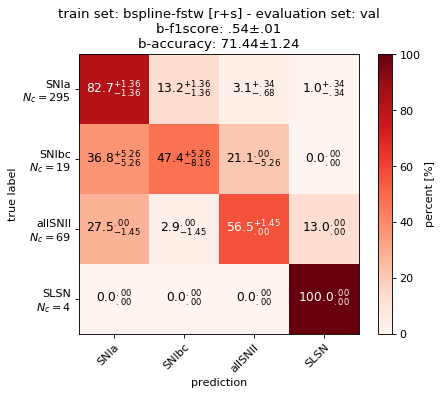

> loading: ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=linear-fstw.splcds
 24%|██▍       | 12/50 [03:21, 18.82s/it, training id: 11 - samples: 38412 - features: 18 ['SF_ML_amplitude_g', 'IAR_phi_g', 'LinearTrend_g', 'SPM_t0_g', 'SPM_gamma_g', 'SPM_beta_g', 'SPM_tau_rise_g', 'SPM_tau_fall_g', 'MHPS_low_g', 'SF_ML_amplitude_r', 'IAR_phi_r', 'LinearTrend_r', 'SPM_t0_r', 'SPM_gamma_r', 'SPM_beta_r', 'SPM_tau_rise_r', 'SPM_tau_fall_r', 'MHPS_low_r']]

In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_
from lcfats.classifiers import train_classifiers
from flamingchoripan.cuteplots.cm_plots import plot_custom_confusion_matrix
from flamingchoripan.datascience.statistics import XError
import matplotlib.pyplot as plt

kf = 0
max_model_ids = 50
test_lcset_name = 'val' # val test
methods = ['bspline-fstw', 'linear-fstw', 'spm-mle-fstw', 'spm-mcmc-fstw', 'spm-mle-estw', 'spm-mcmc-estw']
#methods = ['bspline-fstw', 'linear-fstw', 'spm-mle-fstw']
#methods = ['linear-fstw']
#methods = ['bspline-fstw', 'linear-fstw', 'spm-mle-fstw', 'spm-mcmc-fstw', 'spm-mle-estw']
#methods = ['bspline-fstw']
#methods = ['spm-mcmc-estw']
for method in methods:
    new_cfilename = f'{cfilename}°method={method}'
    filedir = f'{root_folder}/{new_cfilename}.{C_.EXT_SPLIT_LIGHTCURVE}'
    lcdataset = load_pickle(filedir)
    #print(lcdataset);assert 0
    train_configs = [
        #'r',
        #'s',
        'r+s',
        #'r-s',
    ]
    for train_config in train_configs:
        load_rootdir = f'../save/{survey}/{new_cfilename}'
        fit_kwargs = {
            'max_model_ids':max_model_ids,
            'kf':kf,
        }
        train_lcset_name = f'{method} [{train_config}]'
        results_dict, model_ids = train_classifiers(lcdataset, method, train_config, test_lcset_name, load_rootdir, **fit_kwargs)
        
        if not train_config=='r-s':
            ### plot cms
            d = results_dict
            lcset_name = d[model_ids[0]]['test_lcset_name']
            class_names = d[model_ids[0]]['class_names']
            cms = [d[id]['cm'][None] for id in model_ids]
            f1score_xe = XError([d[id]['metrics_dict']['b-f1score'] for id in model_ids])
            accuracy_xe = XError([d[id]['metrics_dict']['b-accuracy'] for id in model_ids])
            title = f'train set: {train_lcset_name} - evaluation set: {lcset_name}\n'
            title += f'b-f1score: {f1score_xe}\n'
            title += f'b-accuracy: {accuracy_xe}'
            cm_kwargs = {
                'title':title,
                'figsize':(6,5),
                'new_order_classes':['SNIa', 'SNIbc', 'allSNII', 'SLSN'],
            }
            fig, ax = plot_custom_confusion_matrix(np.concatenate(cms, axis=0), class_names, **cm_kwargs)
            plt.show()
    
        for id in results_dict.keys():
            save_filedir = f'../save/results/{survey}/{new_cfilename}/{kf}@train_config={train_config}/id={id}.res'
            save_pickle(save_filedir, results_dict[id], verbose=0)

In [8]:
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.datascience.statistics import XError
from flamingchoripan.latex.latex_tables import LatexTable
import pandas as pd

methods = ['bspline-fstw', 'linear-fstw', 'spm-mle-fstw', 'spm-mcmc-fstw', 'spm-mle-estw', 'spm-mcmc-estw']
#methods = ['bspline-fstw', 'linear-fstw', 'spm-mle-fstw']
#methods = ['linear-fstw', 'spm-mle-fstw']

n_decimals = 3
info_dict = {}
for km,method in enumerate(methods):
    new_cfilename = f'{cfilename}°method={method}'
    metrics = [
        'b-accuracy',
        'b-f1score',
        'b-gmean',
        #'b-dpower',
        'b-xentropy',
    ]
    for metric in metrics:
        ### real
        try:
            info_dict[f'metric={metric} [real]']
        except:
            info_dict[f'metric={metric} [real]'] = {}
        for id in range(0, max_model_ids):
            load_filedir = f'../save/results/{survey}/{new_cfilename}/{kf}@train_config=r/id={id}.res'
            rf_results = load_pickle(load_filedir, verbose=0)
            v = rf_results['metrics_dict'][metric]
            try:
                info_dict[f'metric={metric} [real]'][method].append(v)
            except:
                info_dict[f'metric={metric} [real]'][method] = [v]
        
        ### synth
        try:
            info_dict[f'metric={metric} [synth]']
        except:
            info_dict[f'metric={metric} [synth]'] = {}
        for id in range(0, max_model_ids):
            load_filedir = f'../save/results/{survey}/{new_cfilename}/{kf}@train_config=s/id={id}.res'
            rf_results = load_pickle(load_filedir, verbose=0)
            v = rf_results['metrics_dict'][metric]
            try:
                info_dict[f'metric={metric} [synth]'][method].append(v)
            except:
                info_dict[f'metric={metric} [synth]'][method] = [v]
        
        ### real+synth
        try:
            info_dict[f'metric={metric} [real+synth]']
        except:
            info_dict[f'metric={metric} [real+synth]'] = {}
        for id in range(0, max_model_ids):
            load_filedir = f'../save/results/{survey}/{new_cfilename}/{kf}@train_config=r+s/id={id}.res'
            rf_results = load_pickle(load_filedir, verbose=0)
            v = rf_results['metrics_dict'][metric]
            try:
                info_dict[f'metric={metric} [real+synth]'][method].append(v)
            except:
                info_dict[f'metric={metric} [real+synth]'][method] = [v]
        
    continue
    ### real-recall
    metrics = [
        'real-recall',
        'real-xentropy',
    ]
    for metric in metrics:
        try:
            info_dict[f'metric={metric}']
        except:
            info_dict[f'metric={metric}'] = {}
        for id in range(0, max_model_ids):
            load_filedir = f'../save/results/{survey}/{new_cfilename}/{kf}@train_config=r-s/id={id}.res'
            rf_results = load_pickle(load_filedir, verbose=0)
            v = rf_results[metric]
            try:
                info_dict[f'metric={metric}'][method].append(v)
            except:
                info_dict[f'metric={metric}'][method] = [v]
    
info_df = pd.DataFrame.from_dict(info_dict, orient='index').reindex(list(info_dict.keys()))
for c in info_df.columns:
    info_df[c].values[:] = [XError(v) if isinstance(v, list) else v for v in info_df[c].values[:]] # make xerror from list

latex_kwargs = {
    'caption':'$x_j$',
    'label':'???',
    #'bold_criteriums':'max',
    #'custom_tabular_align':'l|cc|cc|cc',
}
latex_table = LatexTable(info_df, **latex_kwargs)
print(latex_table)
info_df
# % \multicolumn{2}{c}{63.09$\pm$2.81}

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\def\srule{\rule{0pt}{2ex}\rule[-1ex]{0pt}{0ex}}
\begin{table*}
\centering
\caption{$x_j$}
\label{???}\vspace{.1cm}
\begin{tabular}{l|cccccc}
\hline
metric & bspline-fstw & linear-fstw & spm-mle-fstw & spm-mcmc-fstw & spm-mle-estw & spm-mcmc-estw \srule\\\hline\hline
b-accuracy [real] & 66.52$\pm$2.02 & 66.22$\pm$1.79 & 66.53$\pm$1.70 & 66.53$\pm$1.74 & 65.84$\pm$1.88 & 66.67$\pm$1.78  \srule\\
b-accuracy [synth] & 70.49$\pm$1.19 & 74.55$\pm$3.00 & 69.12$\pm$1.16 & 79.08$\pm$1.04 & 65.93$\pm$1.10 & 72.86$\pm$1.07  \srule\\
b-accuracy [real+synth] & 74.59$\pm$1.06 & 73.76$\pm$1.66 & 61.13$\pm$1.16 & 73.42$\pm$1.08 & 57.83$\pm$1.33 & 65.48$\pm$1.74  \srule\\
b-f1score [real] & .43$\pm$.01 & .43$\pm$.01 & .43$\pm$.01 & .43$\pm$.01 & .43$\pm$.01 & .43$\pm$.01  \srule\\
b-f1score [synth] & .53$\pm$.01 & .58$\pm$.01 & .56$\pm$.01 & .60$\pm$.01 & .51$\pm$.00 & .53$\pm$.01  \srule\\
b-f1score [

,bspline-fstw,linear-fstw,spm-mle-fstw,spm-mcmc-fstw,spm-mle-estw,spm-mcmc-estw
metric=b-accuracy [real],66.52±2.02,66.22±1.79,66.53±1.70,66.53±1.74,65.84±1.88,66.67±1.78
metric=b-accuracy [synth],70.49±1.19,74.55±3.00,69.12±1.16,79.08±1.04,65.93±1.10,72.86±1.07
metric=b-accuracy [real+synth],74.59±1.06,73.76±1.66,61.13±1.16,73.42±1.08,57.83±1.33,65.48±1.74
metric=b-f1score [real],.43±.01,.43±.01,.43±.01,.43±.01,.43±.01,.43±.01
metric=b-f1score [synth],.53±.01,.58±.01,.56±.01,.60±.01,.51±.00,.53±.01
metric=b-f1score [real+synth],.61±.01,.58±.01,.54±.01,.58±.01,.49±.01,.51±.01
metric=b-gmean [real],.76±.01,.75±.01,.76±.01,.76±.01,.75±.01,.76±.01
metric=b-gmean [synth],.78±.01,.83±.02,.79±.01,.85±.01,.77±.01,.81±.01
metric=b-gmean [real+synth],.82±.01,.81±.01,.74±.01,.81±.01,.72±.01,.77±.01
metric=b-xentropy [real],.90±.00,.90±.01,.90±.01,.90±.01,.90±.01,.90±.01


In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.datascience.statistics import XError
from flamingchoripan.latex.latex_tables import LatexTable
import pandas as pd

methods = ['bspline-nostw', 'linear-nostw', 'curvefit-nostw', 'mcmc-nostw', 'curvefit', 'mcmc']
#methods = ['bspline-nostw']
info_dict = {}
for km,method in enumerate(methods):
    new_cfilename = f'{cfilename}°method={method}'
    load_filedir = f'../save/{survey}/{new_cfilename}/rf.res'
    rf_results = load_pickle(load_filedir)
    model_ids = list(rf_results['train'].keys())
    cmethod = method.replace('-nostw', '')
    rank = rf_results[f'train.{cmethod}'][model_ids[0]]['rank']
    features = rf_results[f'train.{cmethod}'][model_ids[0]]['features']
    print(len(features), features)
    rank.print_n = 20
    rank.values = [v*100 for v in rank.values]
    rank.name = f'rf-importance[%] [{method}]'
    df = rank.get_df()
    df.index = [f'feature={i.replace("_", "-")}' for i in list(df.index)]
    info_dict[method] = df
    break
info_df = info_dict[method]
    
latex_kwargs = {
    'caption':'$x_j$',
    'label':'???',
}
latex_table = LatexTable(info_df, **latex_kwargs)
print(latex_table)
info_df